In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('acs12.csv')
df.shape

(2000, 14)

In [9]:
df.tail(7)

rownames    income          employment  hrs_work   race  age  gender  \
1993      1994       0.0  not in labor force       NaN  black   17    male   
1994      1995   65000.0            employed      48.0  white   53    male   
1995      1996       0.0  not in labor force       NaN  white   71  female   
1996      1997       0.0  not in labor force       NaN  other   50  female   
1997      1998   70000.0            employed      40.0  asian   63    male   
1998      1999  105000.0            employed      50.0  asian   36    male   
1999      2000       0.0          unemployed       NaN  black   22    male   

     citizen  time_to_work     lang married          edu disability  \
1993      no           NaN    other      no  hs or lower         no   
1994     yes          45.0  english     yes  hs or lower        yes   
1995     yes           NaN  english     yes  hs or lower         no   
1996      no           NaN    other     yes  hs or lower         no   
1997     yes          30.0  english      no      college         no   
1998     yes          30.0  english     yes      college         no   
1999     yes           NaN  english      no      college         no   

        birth_qrtr  
1993  oct thru dec  
1994  oct thru dec  
1995  oct thru dec  
1996  jul thru sep  
1997  jan thru mar  
1998  apr thru jun  
1999  oct thru dec

In [10]:
cols = ['employment','race','gender','citizen','lang','married','edu','disability','birth_qrtr']
for col in cols:
    print(f'cột {col} có giá trị phân biệt: ')
    print(df[col].unique())
    print('=============================')

cột employment có giá trị phân biệt: 
['not in labor force' nan 'employed' 'unemployed']
cột race có giá trị phân biệt: 
['white' 'other' 'asian' 'black']
cột gender có giá trị phân biệt: 
['female' 'male']
cột citizen có giá trị phân biệt: 
['yes' 'no']
cột lang có giá trị phân biệt: 
['english' 'other' nan]
cột married có giá trị phân biệt: 
['no' 'yes']
cột edu có giá trị phân biệt: 
['college' 'hs or lower' 'grad' nan]
cột disability có giá trị phân biệt: 
['no' 'yes']
cột birth_qrtr có giá trị phân biệt: 
['jul thru sep' 'jan thru mar' 'oct thru dec' 'apr thru jun']


In [22]:
trinhDoHocVan_na = (df[df['edu'].isna()]).shape[0]
tiLe_trinhDoHocVan_na = trinhDoHocVan_na/df.shape[0]
print('khong co du lieu: ',tiLe_trinhDoHocVan_grad)

trinhDoHocVan_hsOrLower = (df[df['edu'] == 'hs or lower']).shape[0]
tiLe_trinhDoHocVan_hsOrLower = trinhDoHocVan_hsOrLower/df.shape[0]
print('trinh do hoc van hsOrLower: ',tiLe_trinhDoHocVan_hsOrLower)

trinhDoHocVan_college = (df[df['edu'] == 'college']).shape[0]
tiLe_trinhDoHocVan_college = trinhDoHocVan_college/df.shape[0]
print('trinh do hoc van college: ',tiLe_trinhDoHocVan_college)

trinhDoHocVan_grad = (df[df['edu'] == 'grad']).shape[0]
tiLe_trinhDoHocVan_grad = trinhDoHocVan_grad/df.shape[0]
print('trinh do hoc van grad: ',tiLe_trinhDoHocVan_grad)


khong co du lieu:  0.072
trinh do hoc van hsOrLower:  0.7195
trinh do hoc van college:  0.1795
trinh do hoc van grad:  0.072


In [40]:
soNguoi_datGrad_moiChungToc = df[df['edu']=='grad']['race'].value_counts()
soNguoi_moiToc = df['race'].value_counts()
tiLe_datGrad_moiToc = soNguoi_datGrad_moiChungToc/soNguoi_moiToc
tiLe_datGrad_moiToc

race
asian    0.126437
black    0.043689
other    0.059211
white    0.073955
Name: count, dtype: float64

In [48]:
race_percent = df['race'].value_counts(normalize=True) * 100
race_percent


race
white    77.75
black    10.30
other     7.60
asian     4.35
Name: proportion, dtype: float64

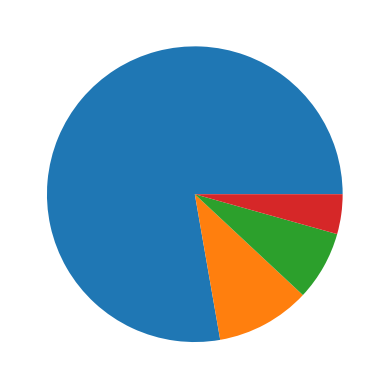

In [49]:
plt.pie(race_percent)
plt.show()

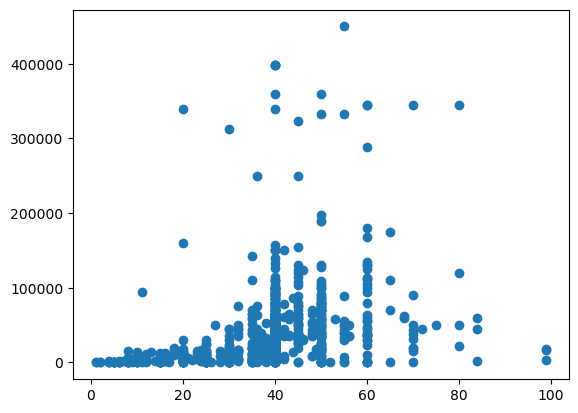

In [56]:
plt.scatter( x = df['hrs_work'],y=df['income'])
plt.show()

## câu 2

In [59]:
from scipy.stats import binom
n =10
p_do = 0.4
p_xanh = 1-p_do

soBongDo = binom.pmf(4,n,p_do)
print('ti le lay 4 bong do la: ',soBongDo)

haiBongXanh = binom.pmf(2,n,p_xanh)
print('ti le lay 2 bong xanh la: ',haiBongXanh)

ti le lay 4 bong do la:  0.25082265599999987
ti le lay 2 bong xanh la:  0.010616832000000003


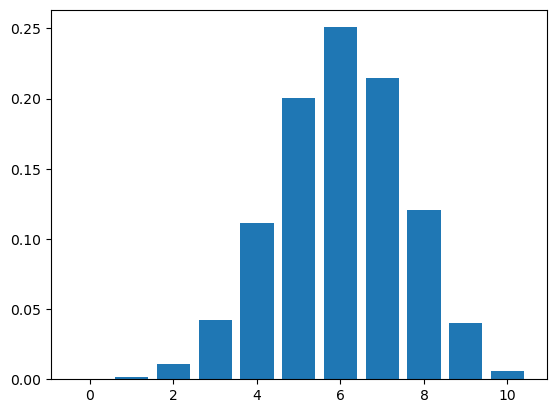

In [73]:
import matplotlib.pyplot as plt
import numpy as np
tap_pmf = []
tap_x = [0,1,2,3,4,5,6,7,8,9,10]
for x in tap_x:
    pmf = binom.pmf(x,n,p_xanh)
    tap_pmf.append(pmf)

plt.bar(tap_x, tap_pmf)
plt.show()

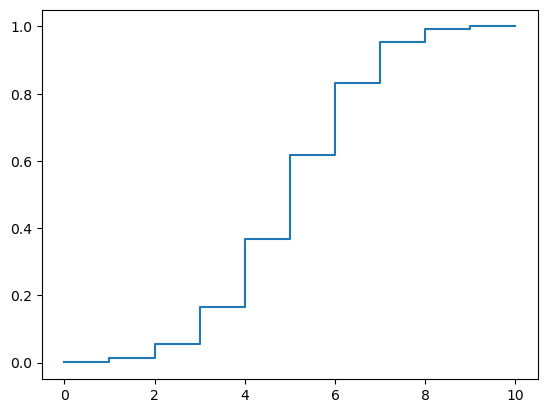

In [78]:
tap_cdf = []
for x in tap_x:
    cdf  = binom.cdf(x,n,p_xanh)
    tap_cdf.append(cdf)
    
plt.step(tap_x,tap_cdf)